In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [3]:
# Read the  dataset
df = pd.read_csv("../dataset/Train.csv", low_memory=False)
variable_def = pd.read_csv("../dataset/Variable_Definitions.csv", low_memory=False)

In [54]:
# Print basic information about raw datasets
print(f"Dataset shape: {df.shape}")

Dataset shape: (8908, 16)


In [55]:
#Check data types and structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2   I/O Data Bytes            8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent                8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [56]:
for feature, description in variable_def.values:
  print(f'{feature} :  {description}')

I/O Data Operations :  Speed at which the process is issuing read and write I/O operations
I/O Data Bytes :  Speed at which the process is reading and writing bytes in I/O operations
Number of subprocesses :  Number of sub-processes that are currently active in a parent process
Time on processor :  The total time, in seconds, that a process has been running
Disk Reading/sec :  Speed of disk reading operations
Disc Writing/sec :  Speed of writing operations to disk
Confirmed byte radius :  The ratio of Memory/Bytes committed and Memory/Confirmation limit
Pages Read/sec :  Speed rate at which the disk was read in order to resolve hard page errors
Pages Input/sec :  Speed at which pages are written to disk to free up space in physical memory
Page Errors/sec :  This is the average number of pages with faults per second
Bytes Sent :  The rate at which bytes leave the browser’s HTTP requests
Received Bytes (HTTP) :  Speed of bytes arriving to the browser’s HTTP responses
Network packets sent

In [57]:
# Summary statistics for numerical columns
print(df.describe().T)

                           count           mean            std        min         25%          50%           75%           max
I/O Data Operations       8908.0      36.429205      75.884647   0.000000    1.394404    11.613803     34.494953  1.795316e+03
I/O Data Bytes            8908.0  113556.435854  489684.616342   0.000000  813.631825  4930.481627  39403.570772  4.677280e+06
Number of subprocesses    8908.0      29.811900       5.691411   1.000000   27.000000    28.000000     30.000000  5.100000e+01
Time on processor         8908.0       0.496405       1.593626   0.000000    0.000000     0.034734      0.451350  2.524615e+01
Disk Reading/sec          8908.0       5.353260      19.286690   0.044459    0.755629     1.711077      5.845619  1.064819e+03
Disc Writing/sec          8908.0       1.046153      15.667814   0.000000    0.000000     0.000000      0.022229  8.315039e+02
Bytes Sent                8908.0     559.546628    1939.745234   1.197890   33.843800    67.366295    221.31481

In [58]:
df.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [4]:
df = df.drop('ID', axis=1)
print(df.shape)

(8908, 15)


In [60]:
df.head()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [61]:
# Check for missing values
df.isnull().sum()

I/O Data Operations         0
I/O Data Bytes              0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent                  0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
Label                       0
dtype: int64

In [62]:
# Check for duplicates
print(df.duplicated().sum())

1276


In [5]:
# Remove duplicates
df = df.drop_duplicates()
# Check for duplicates
print(df.duplicated().sum())

0


In [64]:
# Class distribution
print(df['Label'].value_counts())

Label
0    5228
1    2404
Name: count, dtype: int64


In [65]:
# Calculate the correlation coefficients between all columns and the label column
correlations = df.corr()['Label']
print(correlations.sort_values(ascending=False))

Label                       1.000000
I/O Data Operations         0.102965
Received Bytes (HTTP)       0.045838
Network packets received    0.038237
Network packets sent        0.032601
Pages Read/sec              0.021988
Disc Writing/sec           -0.000509
Bytes Sent                 -0.000568
Pages Input/sec            -0.024590
Time on processor          -0.031595
I/O Data Bytes             -0.053490
Disk Reading/sec           -0.073317
Page Errors/sec            -0.150392
Confirmed byte radius      -0.195319
Number of subprocesses     -0.217128
Name: Label, dtype: float64


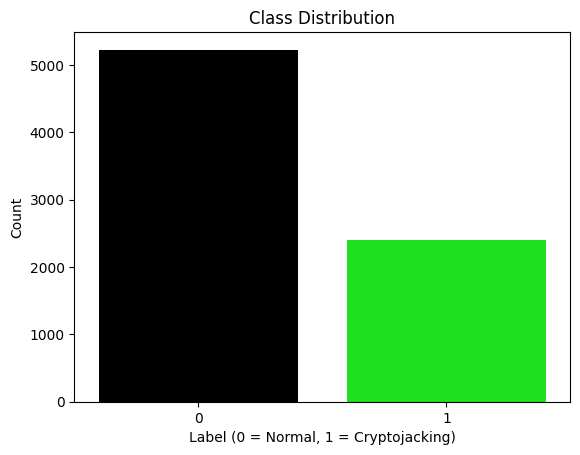

In [66]:
# Class Distribution Plot
sns.countplot(x='Label', data=df, hue='Label', palette={0: 'black', 1: 'lime'}, legend=False)
plt.title('Class Distribution')
plt.xlabel('Label (0 = Normal, 1 = Cryptojacking)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Label'>

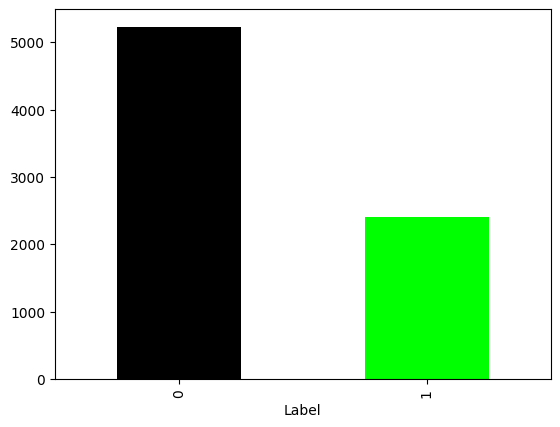

In [67]:
df["Label"].value_counts().plot(kind="bar", color=['black', 'lime'])

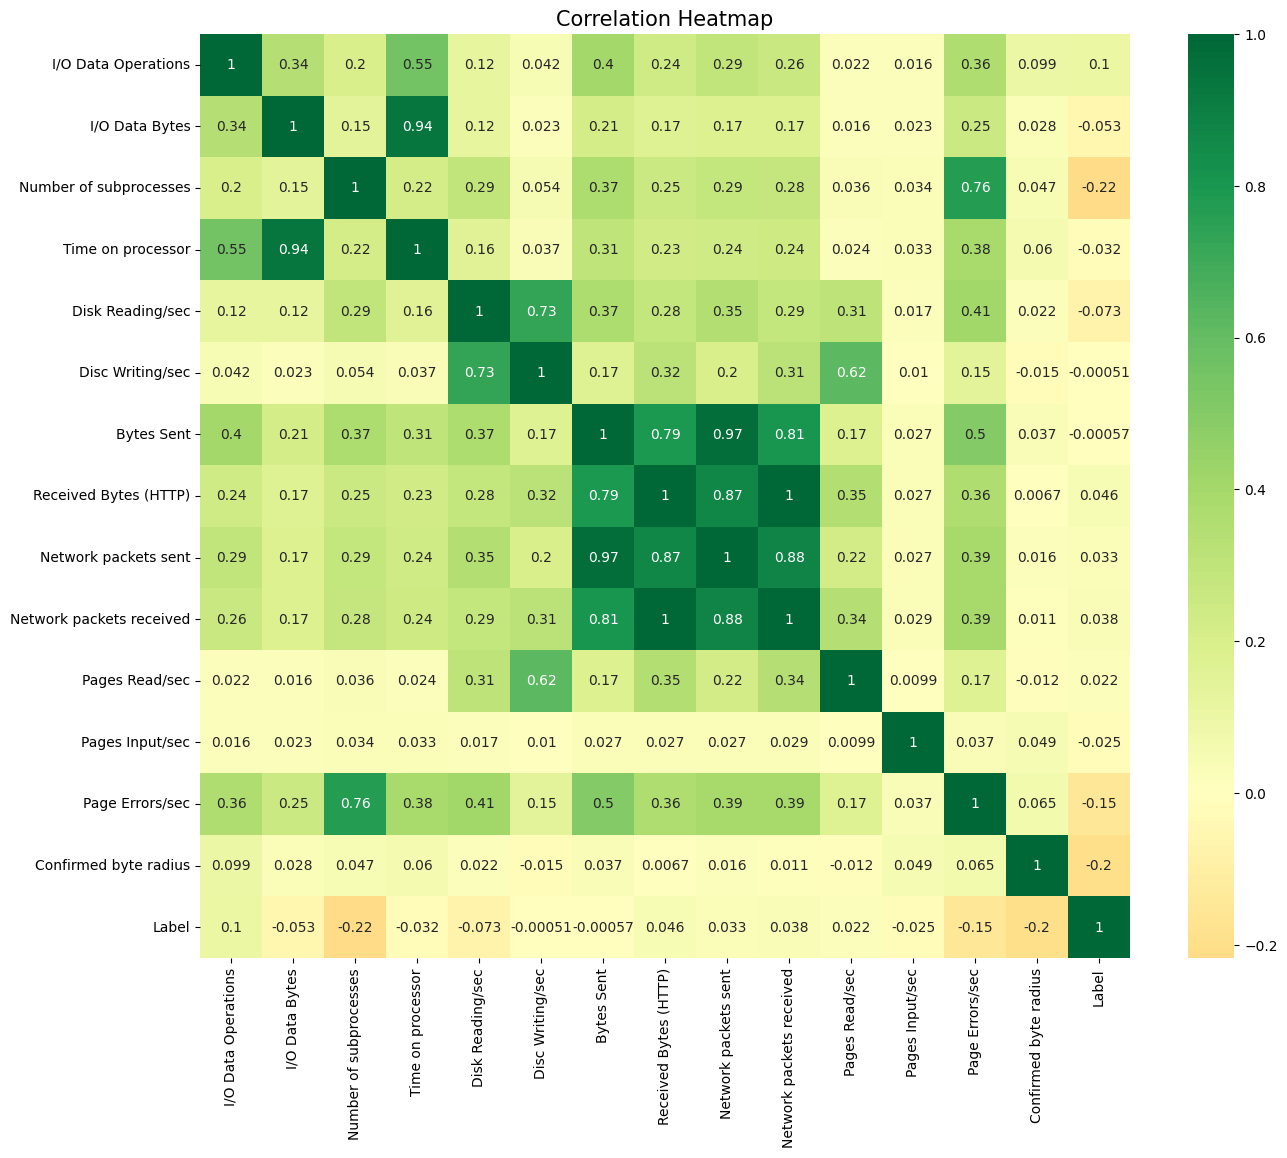

In [68]:
# Correlation Heatmap
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

In [69]:
# Check for outliers using IQR method
numeric_cols = df.select_dtypes(include=np.number).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers

print("Outlier counts per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier counts per column:
I/O Data Operations: 832
I/O Data Bytes: 1376
Number of subprocesses: 998
Time on processor: 457
Disk Reading/sec: 976
Disc Writing/sec: 1617
Bytes Sent: 1428
Received Bytes (HTTP): 1693
Network packets sent: 1355
Network packets received: 1575
Pages Read/sec: 1566
Pages Input/sec: 40
Page Errors/sec: 1502
Confirmed byte radius: 7
Label: 0


In [70]:
# Overall class distribution
print("Overall class distribution:")
print(df['Label'].value_counts(normalize=True))

# Outlier class distribution for a feature
feature = 'I/O Data Operations'
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))
outliers = df[outlier_mask]

print("Outlier class distribution for:", feature)
print(outliers['Label'].value_counts(normalize=True))

Overall class distribution:
Label
0    0.68501
1    0.31499
Name: proportion, dtype: float64
Outlier class distribution for: I/O Data Operations
Label
0    0.582933
1    0.417067
Name: proportion, dtype: float64


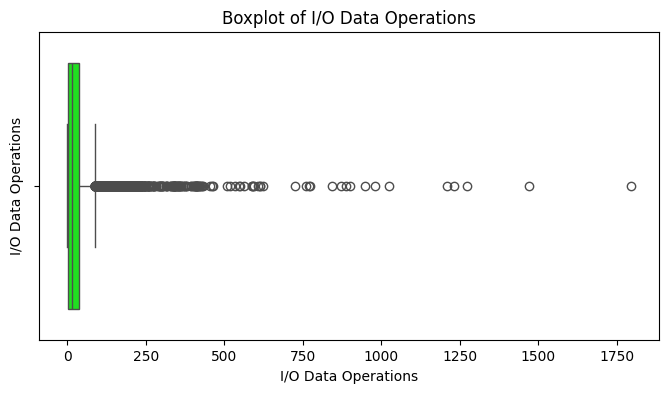

Outlier values for I/O Data Operations:
0       114.798900
28      211.141795
29      224.664189
47      128.074069
48      204.015100
           ...    
8828    205.396746
8856    214.248290
8878    114.332951
8890    142.518285
8893    288.515048
Name: I/O Data Operations, Length: 832, dtype: float64


In [71]:
# Boxplot for 'I/O Data Operations' feature (overall, not grouped by label)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='I/O Data Operations', data=df, color='lime')
plt.title('Boxplot of I/O Data Operations')
plt.ylabel('I/O Data Operations')
plt.show()

# Find outliers for 'I/O Data Operations'
feature = 'I/O Data Operations'
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))
outliers = df[feature][outlier_mask]
print("Outlier values for I/O Data Operations:")
print(outliers)

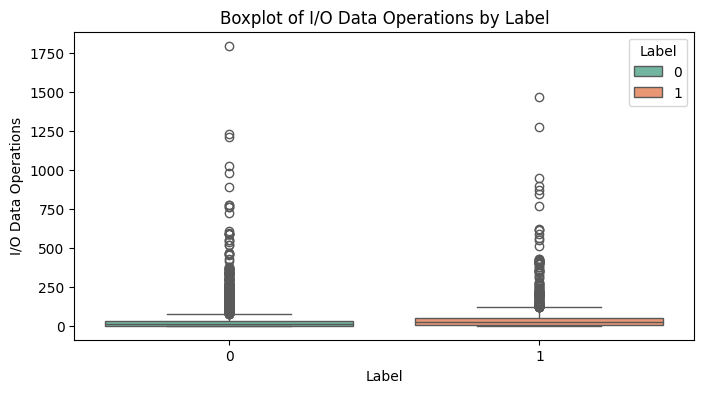

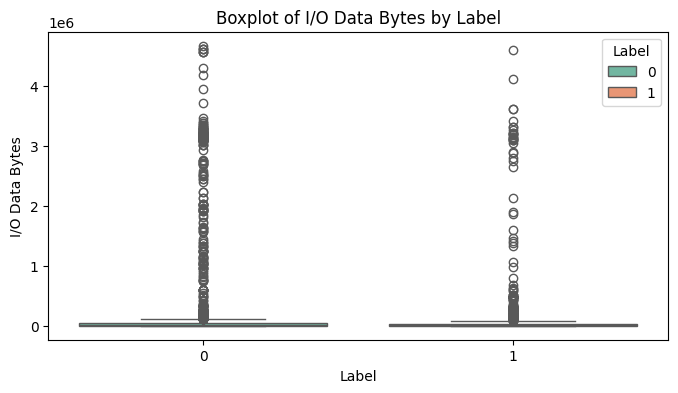

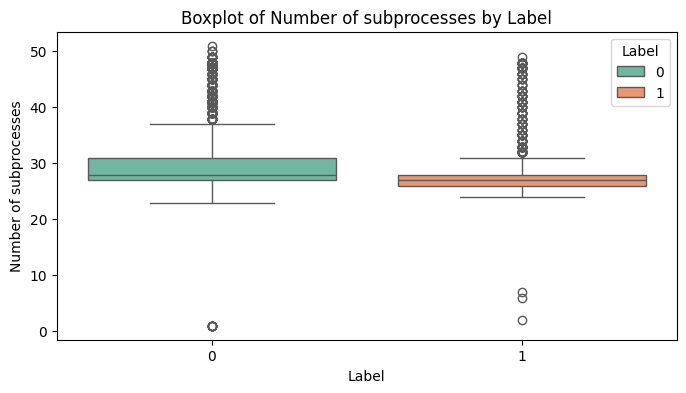

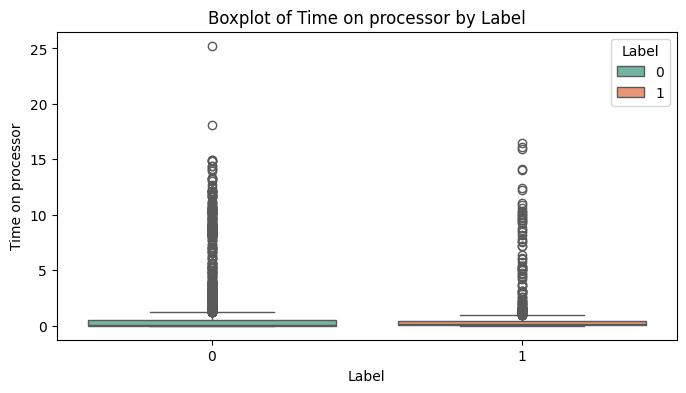

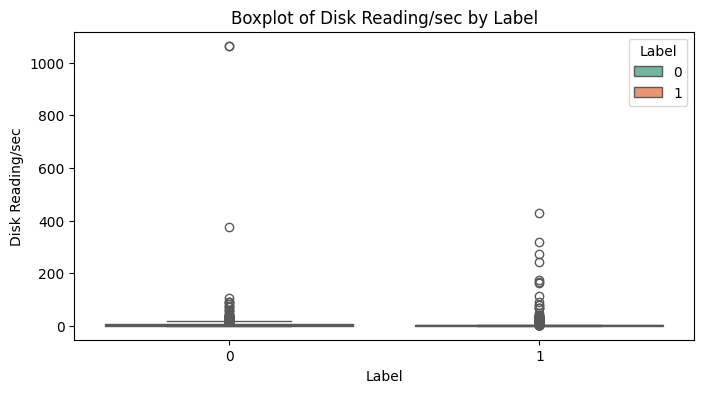

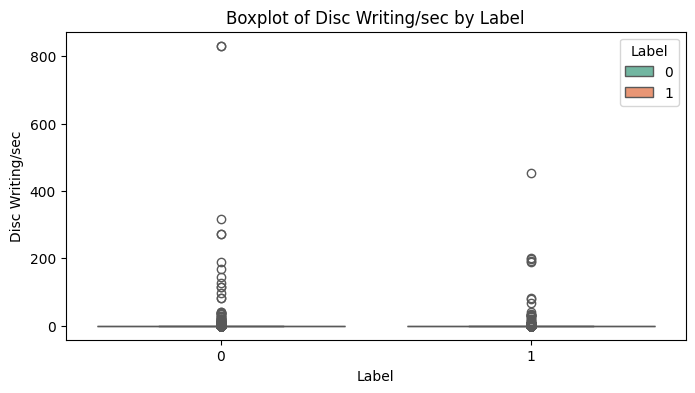

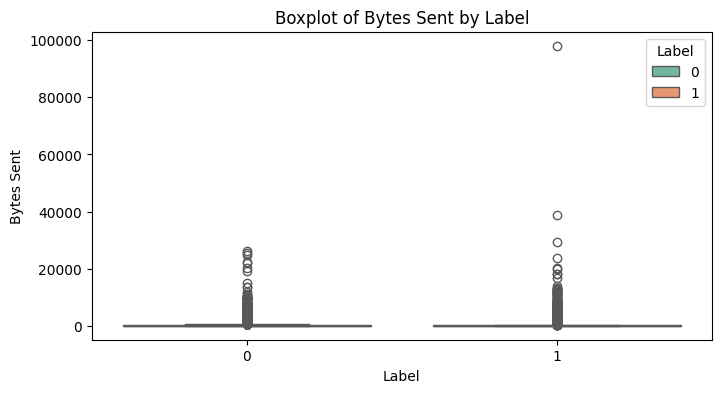

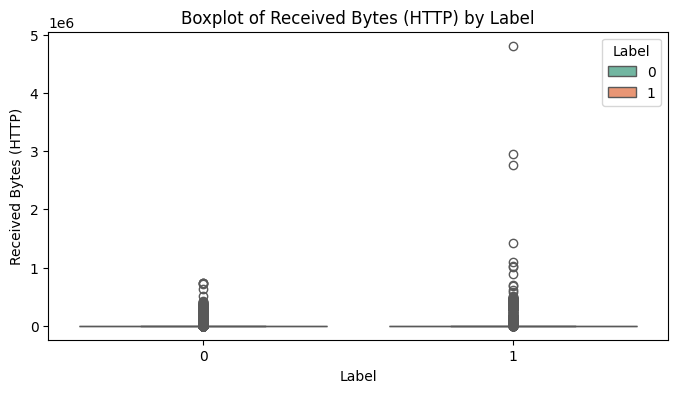

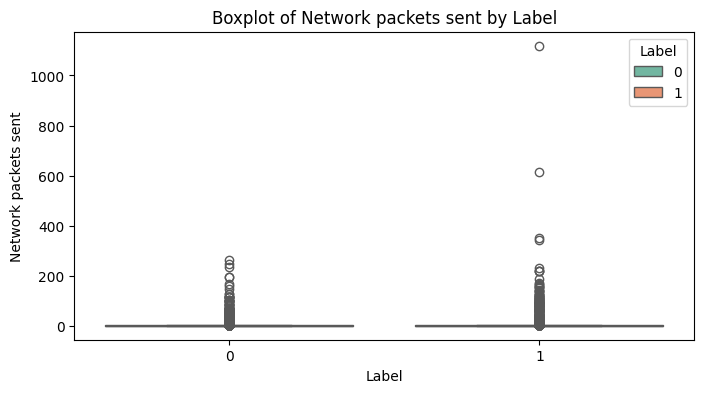

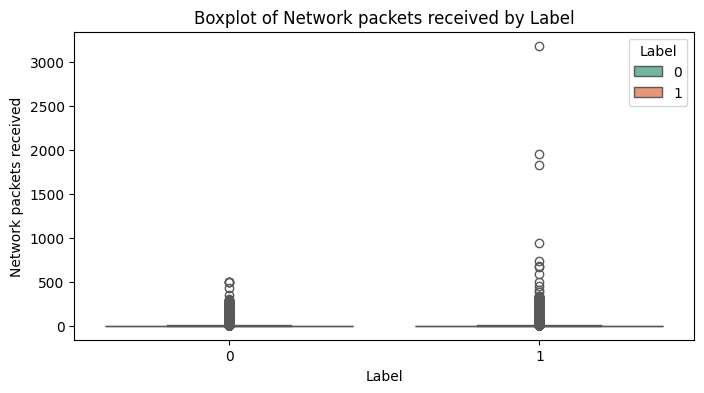

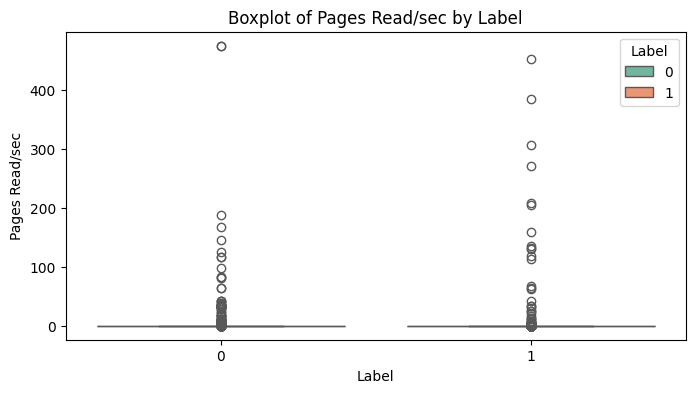

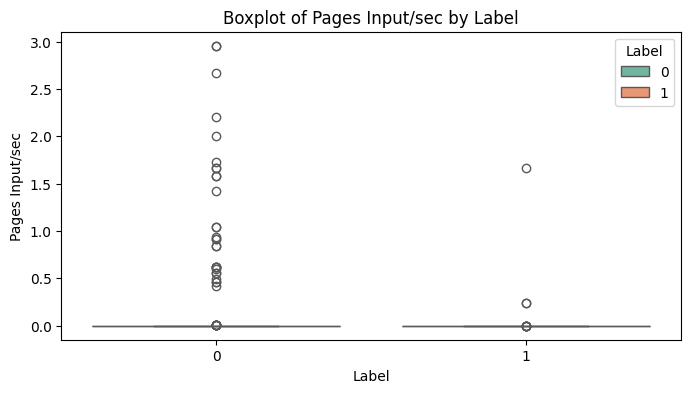

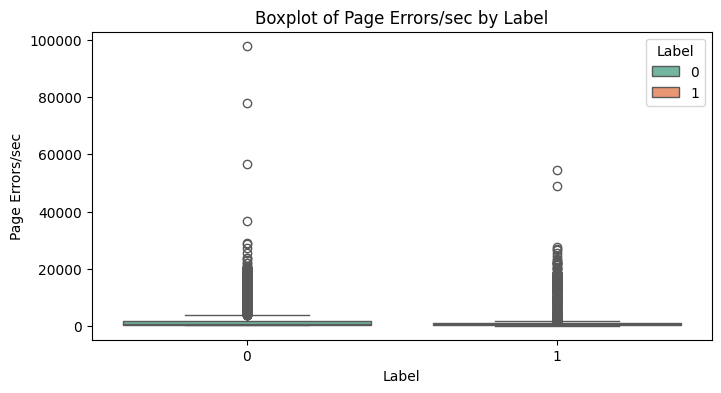

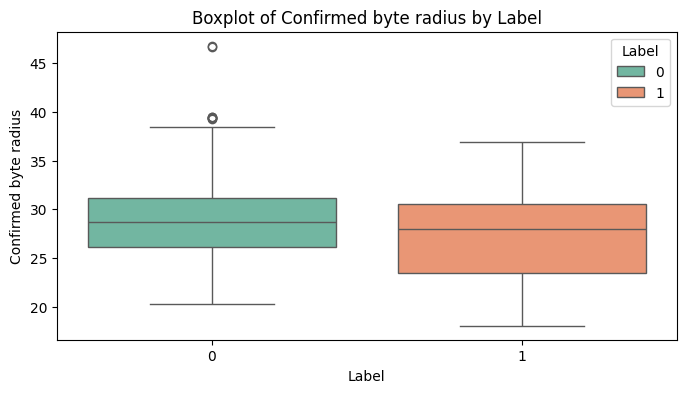

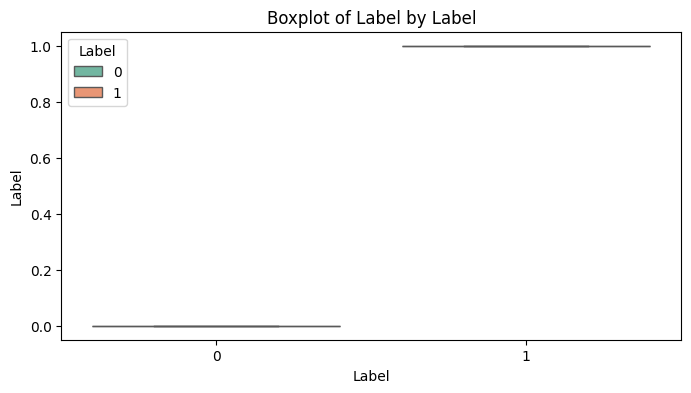

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Label', y=col, data=df, hue='Label', palette='Set2')
    plt.title(f'Boxplot of {col} by Label')
    plt.show()

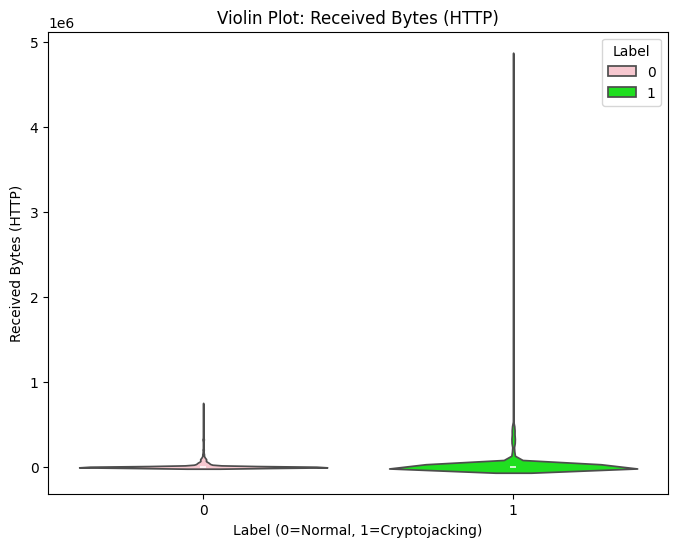

In [72]:
# Violin plot for Received Bytes (HTTP) only
plt.figure(figsize=(8, 6))
sns.violinplot(x='Label', y='Received Bytes (HTTP)', data=df, hue='Label', palette={0: 'pink', 1: 'lime'})
plt.title('Violin Plot: Received Bytes (HTTP)')
plt.xlabel('Label (0=Normal, 1=Cryptojacking)')
plt.ylabel('Received Bytes (HTTP)')
plt.show()

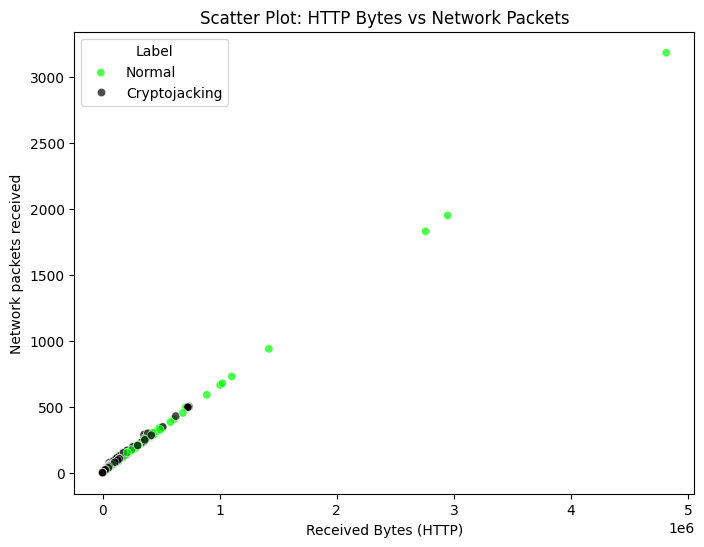

In [73]:
# Scatterplot of Network activity (HTTP bytes vs packets)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Received Bytes (HTTP)', y='Network packets received', data=df, hue='Label', palette={0: 'black', 1: 'lime'}, alpha=0.7)
plt.title('Scatter Plot: HTTP Bytes vs Network Packets')
plt.xlabel('Received Bytes (HTTP)')
plt.ylabel('Network packets received')
plt.legend(title='Label', labels=['Normal', 'Cryptojacking'])
plt.show()

In [6]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Combine back into a DataFrame
df_balanced = pd.DataFrame(X_smote, columns=X.columns)
df_balanced['Label'] = y_smote

print("SMOTE balancing complete. New class distribution:")
print(df_balanced['Label'].value_counts())
print("Dataset shape after SMOTE:", df_balanced.shape)

SMOTE balancing complete. New class distribution:
Label
1    5228
0    5228
Name: count, dtype: int64
Dataset shape after SMOTE: (10456, 15)


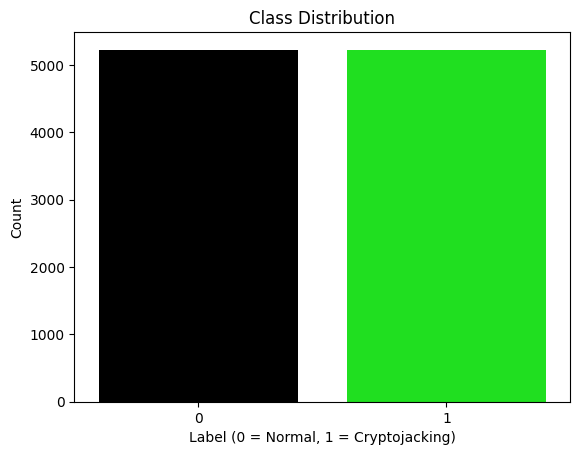

In [75]:
# Class Distribution Plot
sns.countplot(x='Label', data=df_balanced, hue='Label', palette={0: 'black', 1: 'lime'}, legend=False)
plt.title('Class Distribution')
plt.xlabel('Label (0 = Normal, 1 = Cryptojacking)')
plt.ylabel('Count')
plt.show()

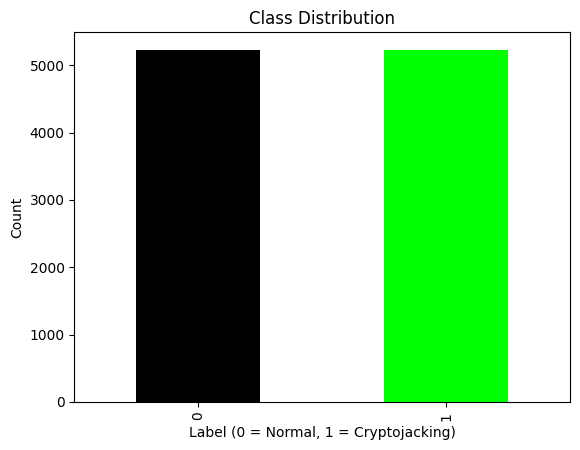

In [41]:
# Class Distribution Plot
df_balanced["Label"].value_counts().sort_index().plot(kind="bar", color=['black', 'lime'])
plt.title('Class Distribution')
plt.xlabel('Label (0 = Normal, 1 = Cryptojacking)')
plt.ylabel('Count')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
features = df_balanced.drop(columns=['Label']).columns

scaler = StandardScaler()
df_scaled = df_balanced.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

print(df_scaled.head())

   I/O Data Operations  I/O Data Bytes  Number of subprocesses  Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent  Received Bytes (HTTP)  Network packets sent  Network packets received  Pages Read/sec  Pages Input/sec  Page Errors/sec  Confirmed byte radius  Label
0             0.971901       -0.217211               -0.255054          -0.027482          0.080991          1.612080   -0.257714              -0.180258             -0.205990                 -0.192095        1.879872         -0.04387        -0.334472              -0.244255      1
1            -0.333383       -0.214054               -0.255054          -0.225002          0.032204         -0.075359   -0.275430              -0.180588             -0.214809                 -0.193196       -0.083489         -0.04387        -0.316412               0.530200      0
2            -0.516376       -0.225532               -0.255054          -0.320181         -0.212204         -0.075359   -0.280980              -0.180748     

In [77]:
df_scaled.head()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,0.971901,-0.217211,-0.255054,-0.027482,0.080991,1.612080,-0.257714,-0.180258,-0.205990,-0.192095,1.879872,-0.04387,-0.334472,-0.244255,1
1,-0.333383,-0.214054,-0.255054,-0.225002,0.032204,-0.075359,-0.275430,-0.180588,-0.214809,-0.193196,-0.083489,-0.04387,-0.316412,0.530200,0
2,-0.516376,-0.225532,-0.255054,-0.320181,-0.212204,-0.075359,-0.280980,-0.180748,-0.225639,-0.197307,-0.083489,-0.04387,-0.474497,0.010167,0
3,-0.110109,0.062712,0.283199,0.038772,0.708922,0.350602,0.012782,-0.113970,-0.086764,-0.117592,0.362134,-0.04387,1.936549,1.590713,0
4,-0.451507,-0.223331,-0.793307,-0.272571,-0.226385,-0.075359,-0.278788,-0.180744,-0.226621,-0.197623,-0.087039,-0.04387,-0.427375,0.874493,1


In [9]:
import joblib

# Save the scaler for use in Flask app
joblib.dump(scaler, '../models/scaler.pkl')
print("✅ Scaler saved to ../models/scaler.pkl")

✅ Scaler saved to ../models/scaler.pkl


In [10]:
# Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Split features and target from the scaled balanced dataset
X = df_scaled.drop(columns=['Label'])
y = df_scaled['Label']

# Select top K features using F-test
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Save the feature selector
joblib.dump(selector, '../models/feature_selector.pkl')

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected {k} features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Show feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print(f"\nSelected {k} Feature Scores:")
print(feature_scores.head(k))


Selected 10 features:
1. I/O Data Operations
2. I/O Data Bytes
3. Number of subprocesses
4. Time on processor
5. Disk Reading/sec
6. Received Bytes (HTTP)
7. Network packets received
8. Pages Input/sec
9. Page Errors/sec
10. Confirmed byte radius

Selected 10 Feature Scores:
                     Feature       Score
2     Number of subprocesses  738.172221
13     Confirmed byte radius  498.032707
12           Page Errors/sec  345.946810
0        I/O Data Operations  114.792735
4           Disk Reading/sec   84.796912
1             I/O Data Bytes   41.842250
3          Time on processor   16.562469
7      Received Bytes (HTTP)   15.344756
9   Network packets received    9.949007
11           Pages Input/sec    8.498621


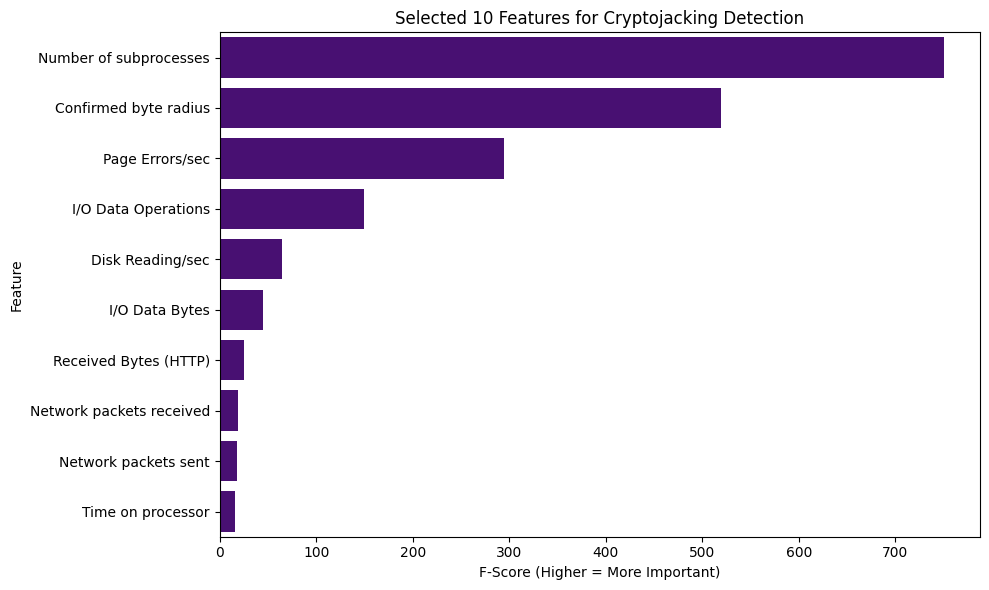

In [62]:
# Visualize feature scores

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_features = feature_scores.head(k)
sns.barplot(data=top_features, x='Score', y='Feature', color='indigo')
plt.title(f'Selected {k} Features for Cryptojacking Detection')
plt.xlabel('F-Score (Higher = More Important)')
plt.tight_layout()
plt.show()

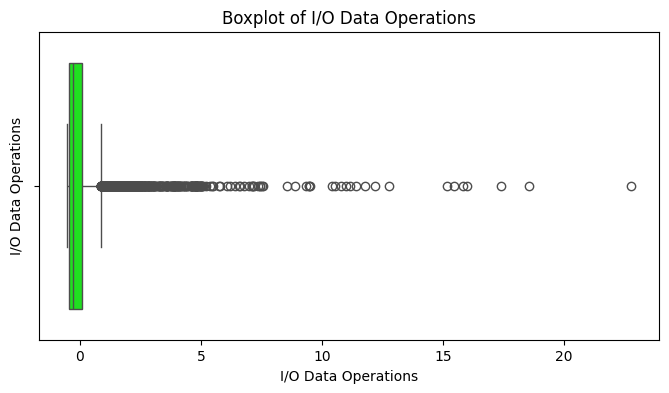

In [80]:
# Boxplot for 'I/O Data Operations' feature
plt.figure(figsize=(8, 4))
sns.boxplot(x='I/O Data Operations', data=df_scaled, color='lime')
plt.title('Boxplot of I/O Data Operations')
plt.ylabel('I/O Data Operations')
plt.show()

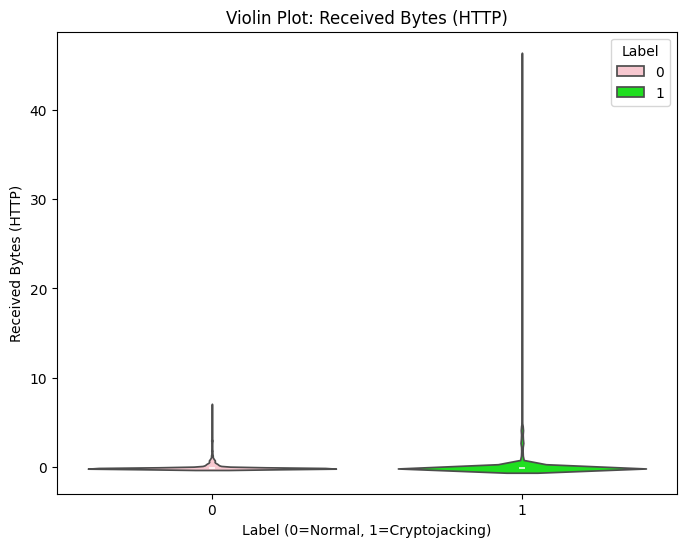

In [47]:
# Violin plot for Received Bytes (HTTP)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Label', y='Received Bytes (HTTP)', data=df_scaled, hue='Label', palette={0: 'pink', 1: 'lime'})
plt.title('Violin Plot: Received Bytes (HTTP)')
plt.xlabel('Label (0=Normal, 1=Cryptojacking)')
plt.ylabel('Received Bytes (HTTP)')
plt.show()

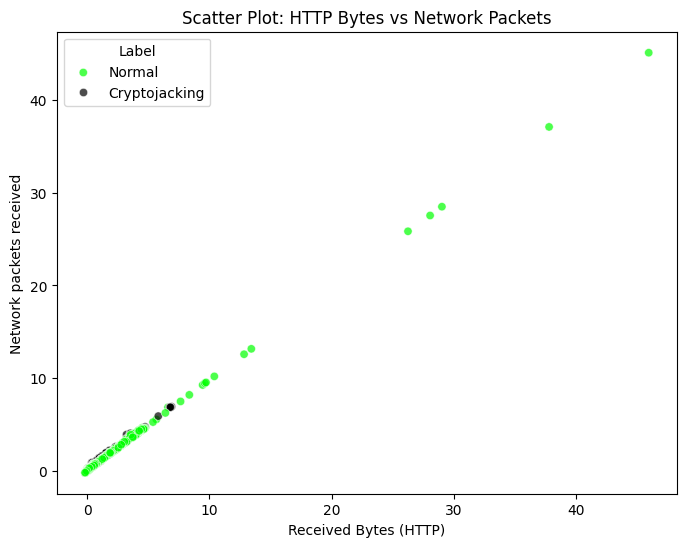

In [48]:
# Scatterplot of Network activity (HTTP bytes vs packets)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Received Bytes (HTTP)', y='Network packets received', data=df_scaled, hue='Label', palette={0: 'black', 1: 'lime'}, alpha=0.7)
plt.title('Scatter Plot: HTTP Bytes vs Network Packets')
plt.xlabel('Received Bytes (HTTP)')
plt.ylabel('Network packets received')
plt.legend(title='Label', labels=['Normal', 'Cryptojacking'])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8364, 10)
Test shape: (2092, 10)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Random Forest
rf = RandomForestClassifier(random_state=42, max_depth=10, n_jobs=-1)
rf.fit(X_train, y_train)
rf_test_pred = rf.predict(X_test)

# Save Random Forest model
joblib.dump(rf, '../models/random_forest_model.pkl')

# Training accuracy for Random Forest
rf_train_pred = rf.predict(X_train)
print("Random Forest Training Classification Report:\n", classification_report(y_train, rf_train_pred))

# Testing accuracy for Random Forest
test_accuracy = accuracy_score(y_test, rf_test_pred)
print(f"\nRandom Forest Accuracy: {test_accuracy*100:.2f}%")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_test_pred))

Random Forest Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4182
           1       0.96      0.98      0.97      4182

    accuracy                           0.97      8364
   macro avg       0.97      0.97      0.97      8364
weighted avg       0.97      0.97      0.97      8364


Random Forest Accuracy: 94.89%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1046
           1       0.94      0.96      0.95      1046

    accuracy                           0.95      2092
   macro avg       0.95      0.95      0.95      2092
weighted avg       0.95      0.95      0.95      2092



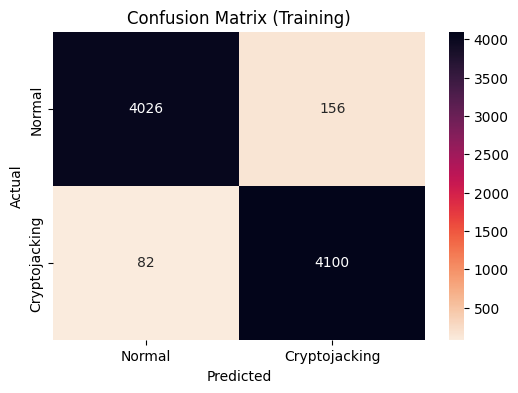

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Training confusion matrix
cm_train = confusion_matrix(y_train, rf_train_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')
plt.show()

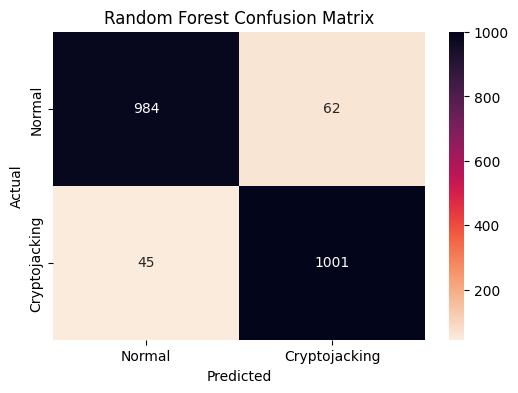

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Testing confusion matrix
cm_test = confusion_matrix(y_test, rf_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Random Forest Feature Importance:
 1. I/O Data Operations      : 0.2850
 2. I/O Data Bytes           : 0.1802
 3. Number of subprocesses   : 0.1565
 4. Time on processor        : 0.0705
 5. Disk Reading/sec         : 0.1185
 6. Received Bytes (HTTP)    : 0.0368
 7. Network packets sent     : 0.0247
 8. Network packets received : 0.0207
 9. Page Errors/sec          : 0.0700
10. Confirmed byte radius    : 0.0371


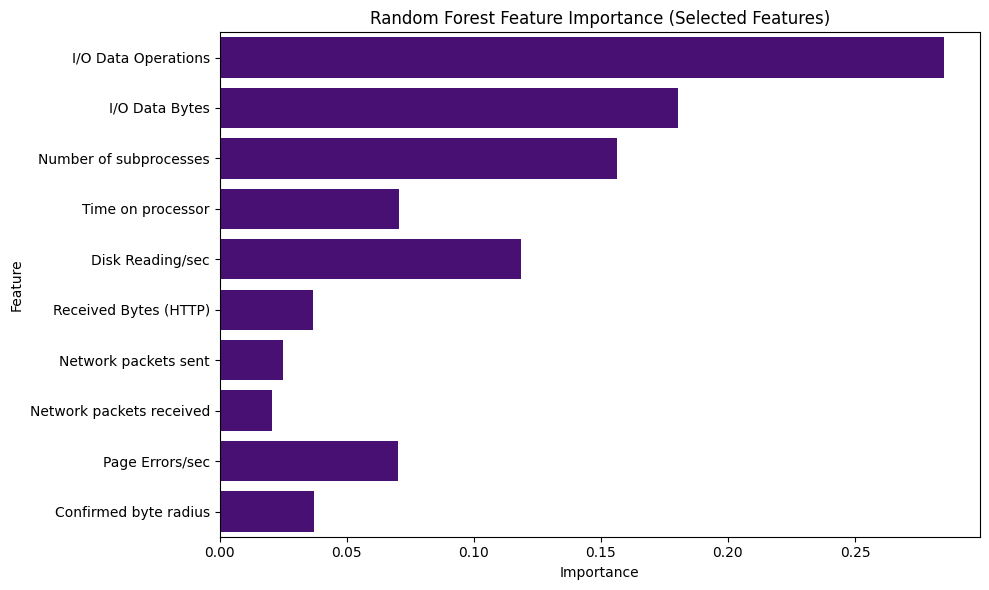

In [108]:
# Random Forest Feature Importance
rf_importance = rf.feature_importances_
feature_names = df.drop(columns=['ID', 'Label']).columns[selector.get_support()]

# Print the importance values
print("Random Forest Feature Importance:")
for i, (feature, importance) in enumerate(zip(feature_names, rf_importance), 1):
    print(f"{i:2d}. {feature:25s}: {importance:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance, y=feature_names, color='indigo')
plt.title('Random Forest Feature Importance (Selected Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

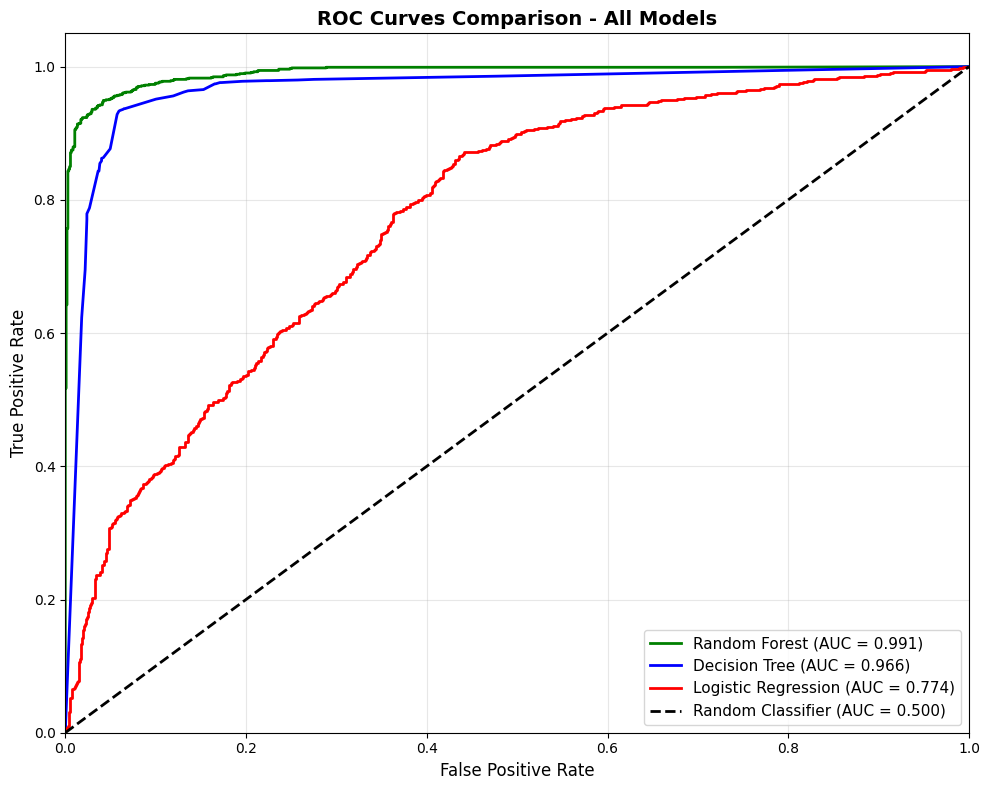

ROC-AUC COMPARISON SUMMARY
Random Forest AUC:      0.9909
Decision Tree AUC:      0.9662
Logistic Regression AUC: 0.7737
Best performing model: Random Forest (AUC = 0.9909)


In [18]:
# ROC Curves for All Models in Single Figure
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities for all models
rf_prob = rf.predict_proba(X_test)[:, 1]
dt_prob = dt.predict_proba(X_test)[:, 1]
lr_prob = lr.predict_proba(X_test)[:, 1]

# Calculate ROC curves for all models
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)

# Calculate AUC scores
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot all ROC curves in single figure
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, 
         label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.500)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison - All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

# Add text box with model comparison
best_model = max([('Random Forest', roc_auc_rf), ('Decision Tree', roc_auc_dt), 
                  ('Logistic Regression', roc_auc_lr)], key=lambda x: x[1])

plt.tight_layout()
plt.show()

# Print comparison summary
print("=" * 60)
print("ROC-AUC COMPARISON SUMMARY")
print("=" * 60)
print(f"Random Forest AUC:      {roc_auc_rf:.4f}")
print(f"Decision Tree AUC:      {roc_auc_dt:.4f}")
print(f"Logistic Regression AUC: {roc_auc_lr:.4f}")
print("=" * 60)
print(f"Best performing model: {best_model[0]} (AUC = {best_model[1]:.4f})")
print("=" * 60)

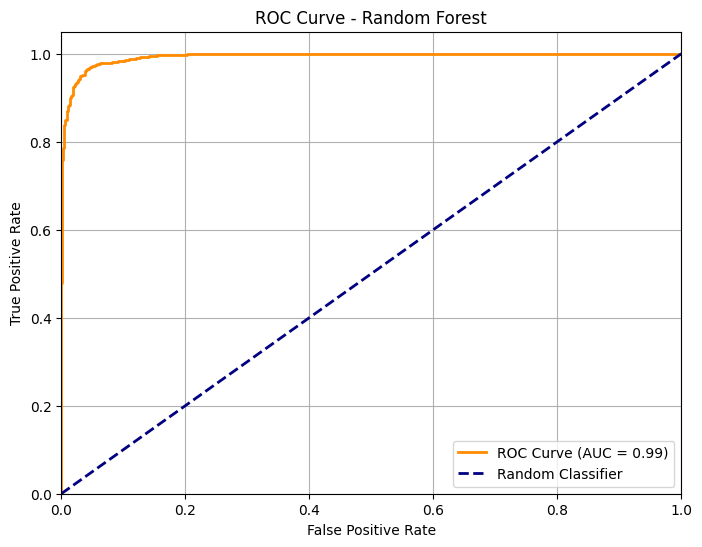

AUC Score: 0.9936


In [140]:
# ROC Curve for Random Forest
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
rf_prob = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

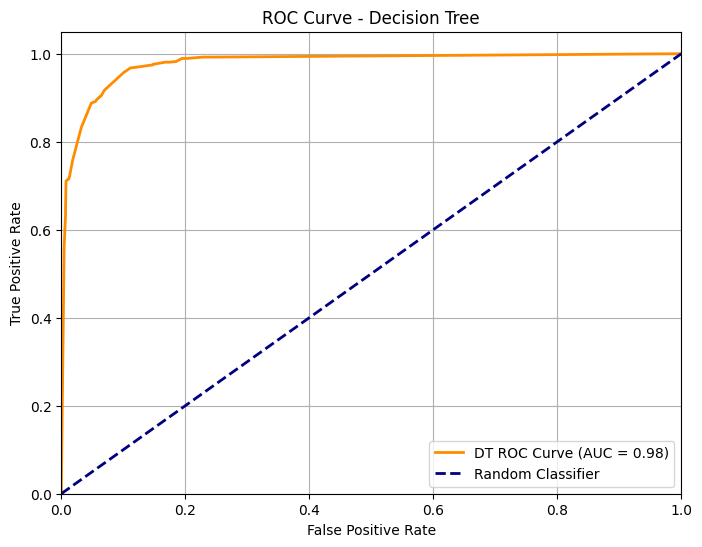

DT AUC Score: 0.9777


In [144]:
# ROC Curve for Decision Tree
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities for DT
dt_prob = dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve for DT
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for DT
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'DT ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"DT AUC Score: {roc_auc_dt:.4f}")

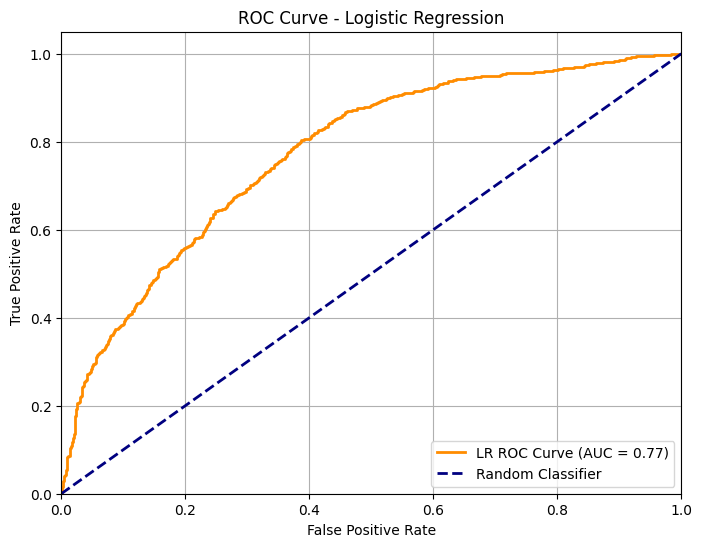

LR AUC Score: 0.7743


In [141]:
# ROC Curve for Logistic Regression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities for LR
lr_prob = lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve for LR
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for LR
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'LR ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"LR AUC Score: {roc_auc_lr:.4f}")

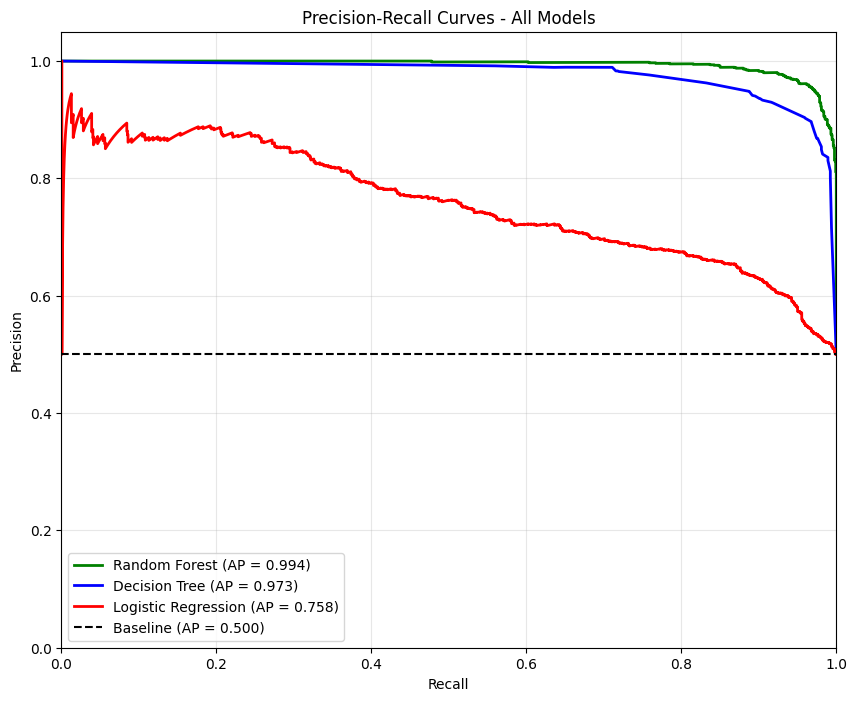

=== PRECISION-RECALL COMPARISON ===
Random Forest AP:       0.9935
Decision Tree AP:       0.9731
Logistic Regression AP: 0.7578


In [ ]:
# Precision-Recall Curves (especially useful for imbalanced datasets)
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate PR curves
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_prob)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_prob)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_prob)

# Calculate Average Precision scores
ap_rf = average_precision_score(y_test, rf_prob)
ap_dt = average_precision_score(y_test, dt_prob)
ap_lr = average_precision_score(y_test, lr_prob)

# Plot PR curves
plt.figure(figsize=(10, 8))
plt.plot(recall_rf, precision_rf, color='green', lw=2, label=f'Random Forest (AP = {ap_rf:.3f})')
plt.plot(recall_dt, precision_dt, color='blue', lw=2, label=f'Decision Tree (AP = {ap_dt:.3f})')
plt.plot(recall_lr, precision_lr, color='red', lw=2, label=f'Logistic Regression (AP = {ap_lr:.3f})')

# Baseline (random classifier for balanced dataset)
baseline = sum(y_test) / len(y_test)
plt.axhline(y=baseline, color='black', linestyle='--', label=f'Baseline (AP = {baseline:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - All Models')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

print("=== PRECISION-RECALL COMPARISON ===")
print(f"Random Forest AP:       {ap_rf:.4f}")
print(f"Decision Tree AP:       {ap_dt:.4f}")
print(f"Logistic Regression AP: {ap_lr:.4f}")

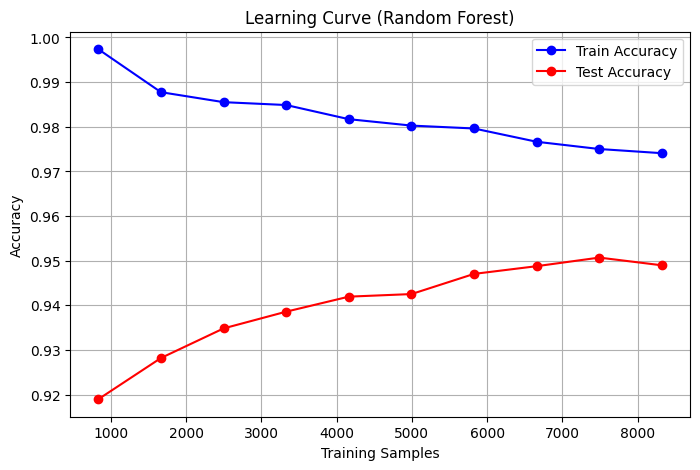

In [31]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Test Accuracy')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import joblib

# Load saved models, scaler and feature selector
rf = joblib.load('../models/random_forest_model.pkl')
dt = joblib.load('../models/decision_tree_model.pkl')
lr = joblib.load('../models/logistic_regression_model.pkl')
scaler = joblib.load('../models/scaler.pkl')
selector = joblib.load('../models/feature_selector.pkl')

# Load train data to get feature order
df_train = pd.read_csv("../dataset/Train.csv", low_memory=False)
feature_names = df_train.drop(columns=['ID', 'Label']).columns

# Define the two sets of values
values1 = [32.7094298, 121124.1414, 30.40735917, 0.496718733, 3.999063766, 0, 335.565884, 737.3384903, 1.844012736, 1.910663799, 0.311038293, 0, 726.318848, 20.00868554]

values2 = [114.5246839, 3888.550764, 28, 0.486075377, 0.777719041, 0.199984896, 11.354698, 11.33247745, 0.177764352, 0.133323264, 0, 0, 504.8285398, 30.09114052]

def predict_all_models(values, case_name):
    # Convert to DataFrame for scaling
    custom_df = pd.DataFrame([values], columns=feature_names)
    # Scale features
    custom_scaled = scaler.transform(custom_df)
    custom_scaled_df = pd.DataFrame(custom_scaled, columns=feature_names)
    # Apply feature selection
    custom_selected = selector.transform(custom_scaled_df)
    
    print(f"{case_name}:")
    print("-" * 40)
    # Print input values
    print("Input Variable Values:")
    print("-" * 25)
    for i, (feature, value) in enumerate(zip(feature_names, values), 1):
        print(f"{i:2d}. {feature:<30}: {value:>12.6f}")
    print("\nModel Predictions:")
    print("-" * 25)
    
    # Random Forest predictions
    rf_prediction = rf.predict(custom_selected)
    rf_proba = rf.predict_proba(custom_selected)
    rf_result = "Normal" if rf_prediction[0] == 0 else "Cryptojacking"
    print(f"Random Forest: {rf_result} (Confidence: Normal={rf_proba[0][0]*100:.2f}%, Cryptojacking={rf_proba[0][1]*100:.2f}%)")
    
    # Decision Tree predictions
    dt_prediction = dt.predict(custom_selected)
    dt_proba = dt.predict_proba(custom_selected)
    dt_result = "Normal" if dt_prediction[0] == 0 else "Cryptojacking"
    print(f"Decision Tree: {dt_result} (Confidence: Normal={dt_proba[0][0]*100:.2f}%, Cryptojacking={dt_proba[0][1]*100:.2f}%)")
    
    # Logistic Regression predictions
    lr_prediction = lr.predict(custom_selected)
    lr_proba = lr.predict_proba(custom_selected)
    lr_result = "Normal" if lr_prediction[0] == 0 else "Cryptojacking"
    print(f"Logistic Regression: {lr_result} (Confidence: Normal={lr_proba[0][0]*100:.2f}%, Cryptojacking={lr_proba[0][1]*100:.2f}%)")
    print()

# Test both cases with all models
predict_all_models(values1, "First Case")
predict_all_models(values2, "Second Case")

First Case:
----------------------------------------
Input Variable Values:
-------------------------
 1. I/O Data Operations           :    32.709430
 2. I/O Data Bytes                : 121124.141400
 3. Number of subprocesses        :    30.407359
 4. Time on processor             :     0.496719
 5. Disk Reading/sec              :     3.999064
 6. Disc Writing/sec              :     0.000000
 7. Bytes Sent                    :   335.565884
 8. Received Bytes (HTTP)         :   737.338490
 9. Network packets sent          :     1.844013
10. Network packets received      :     1.910664
11. Pages Read/sec                :     0.311038
12. Pages Input/sec               :     0.000000
13. Page Errors/sec               :   726.318848
14. Confirmed byte radius         :    20.008686

Model Predictions:
-------------------------
Random Forest: Normal (Confidence: Normal=69.23%, Cryptojacking=30.77%)
Decision Tree: Normal (Confidence: Normal=89.23%, Cryptojacking=10.77%)
Logistic Regression: 

In [100]:
import pandas as pd
import joblib

# Load saved model, scaler and feature selector
rf = joblib.load('../models/random_forest_model.pkl')
scaler = joblib.load('../models/scaler.pkl')
selector = joblib.load('../models/feature_selector.pkl')

# Load train data to get feature order
df_train = pd.read_csv("../dataset/Train.csv", low_memory=False)
feature_names = df_train.drop(columns=['ID', 'Label']).columns

custom_values = [114.798900, 3790.450939, 28, 0.427078, 6.162365, 21.220403, 58.492773, 63.959387, 0.621206, 0.521813, 24.624612, 0, 1001.533430, 27.190843]

# Convert to DataFrame for scaling
custom_df = pd.DataFrame([custom_values], columns=feature_names)
print("Custom feature values:")
print(custom_df.iloc[0])

# Scale features
custom_scaled = scaler.transform(custom_df)

# To avoid warning convert the scaled array back to a DataFrame with the correct feature names before prediction
custom_scaled_df = pd.DataFrame(custom_scaled, columns=feature_names)

# Apply feature selection (select only the 10 features the model was trained on)
custom_selected = selector.transform(custom_scaled_df)

# Predict
prediction = rf.predict(custom_selected)
print("\nPrediction for custom input:", "Normal" if prediction[0] == 0 else "Cryptojacking")

Custom feature values:
I/O Data Operations          114.798900
I/O Data Bytes              3790.450939
Number of subprocesses        28.000000
Time on processor              0.427078
Disk Reading/sec               6.162365
Disc Writing/sec              21.220403
Bytes Sent                    58.492773
Received Bytes (HTTP)         63.959387
Network packets sent           0.621206
Network packets received       0.521813
Pages Read/sec                24.624612
Pages Input/sec                0.000000
Page Errors/sec             1001.533430
Confirmed byte radius         27.190843
Name: 0, dtype: float64

Prediction for custom input: Cryptojacking


In [ ]:
import pandas as pd
import joblib

# Load saved model, scaler and feature selector
rf = joblib.load('../models/random_forest_model.pkl')
scaler = joblib.load('../models/scaler.pkl')
selector = joblib.load('../models/feature_selector.pkl')

# Load train data
df_train = pd.read_csv("../dataset/Train.csv", low_memory=False)

# Get first row (excluding ID and Label) as DataFrame (not Series)
first_row_df = df_train.drop(columns=['ID', 'Label']).iloc[[0]]  # Double brackets to keep as DataFrame
print("Original feature values for first row:")
print(first_row_df.iloc[0])

# Scale features (DataFrame input maintains feature names)
first_row_scaled = scaler.transform(first_row_df)

# Convert back to DataFrame with correct feature names
first_row_scaled_df = pd.DataFrame(first_row_scaled, columns=first_row_df.columns)

# Apply feature selection
first_row_selected = selector.transform(first_row_scaled_df)

# Predict
prediction = rf.predict(first_row_selected)
prediction_proba = rf.predict_proba(first_row_selected)

print(f"\nPrediction: {'Normal' if prediction[0] == 0 else 'Cryptojacking'}")
print(f"Confidence: Normal={prediction_proba[0][0]:.4f}, Cryptojacking={prediction_proba[0][1]:.4f}")

# Show which features were selected and their values
selected_feature_names = df_train.drop(columns=['ID', 'Label']).columns[selector.get_support()]
print(f"\nSelected features used for prediction:")
for i, feature in enumerate(selected_feature_names):
    original_value = first_row_df[feature].iloc[0]
    scaled_value = first_row_scaled_df[feature].iloc[0]
    print(f"{i+1:2d}. {feature:25s}: Original={original_value:10.3f}, Scaled={scaled_value:8.3f}")

Original feature values for first row:
I/O Data Operations          114.798900
I/O Data Bytes              3790.450939
Number of subprocesses        28.000000
Time on processor              0.427078
Disk Reading/sec               6.162365
Disc Writing/sec              21.220403
Bytes Sent                    58.492773
Received Bytes (HTTP)         63.959387
Network packets sent           0.621206
Network packets received       0.521813
Pages Read/sec                24.624612
Pages Input/sec                0.000000
Page Errors/sec             1001.533430
Confirmed byte radius         27.190843
Name: 0, dtype: float64

Prediction: Cryptojacking
Confidence: Normal=0.3545, Cryptojacking=0.6455

Selected features used for prediction:
 1. I/O Data Operations      : Original=   114.799, Scaled=   0.974
 2. I/O Data Bytes           : Original=  3790.451, Scaled=  -0.216
 3. Number of subprocesses   : Original=    28.000, Scaled=  -0.229
 4. Time on processor        : Original=     0.427, Scaled

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
dt_test_pred = dt.predict(X_test)

# Save Decision Tree model
joblib.dump(dt, '../models/decision_tree_model.pkl')

# Training accuracy for Decision Tree
dt_train_pred = dt.predict(X_train)
print("Decision Tree Training Classification Report:\n", classification_report(y_train, dt_train_pred))

# Testing accuracy for Decision Tree
test_accuracy_dt = accuracy_score(y_test, dt_test_pred)
print(f"\nDecision Tree Accuracy: {test_accuracy_dt*100:.2f}%")
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_test_pred))

Decision Tree Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4182
           1       0.97      0.96      0.96      4182

    accuracy                           0.96      8364
   macro avg       0.96      0.96      0.96      8364
weighted avg       0.96      0.96      0.96      8364


Decision Tree Accuracy: 93.59%
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1046
           1       0.94      0.94      0.94      1046

    accuracy                           0.94      2092
   macro avg       0.94      0.94      0.94      2092
weighted avg       0.94      0.94      0.94      2092



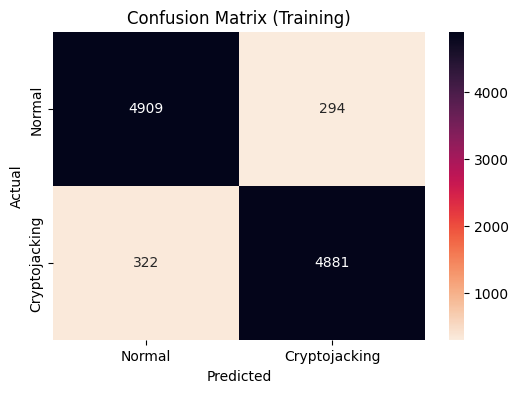

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Testing confusion matrix
cm_train = confusion_matrix(y_train, dt_train_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')
plt.show()

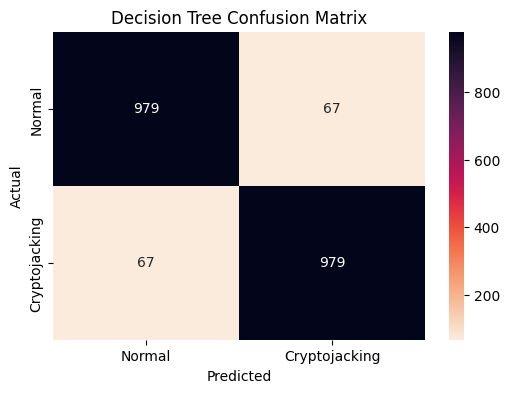

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Testing confusion matrix
cm_test = confusion_matrix(y_test, dt_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Decision Tree Feature Importance:
 1. I/O Data Operations      : 0.5155
 2. I/O Data Bytes           : 0.0788
 3. Number of subprocesses   : 0.1936
 4. Time on processor        : 0.0788
 5. Disk Reading/sec         : 0.0437
 6. Received Bytes (HTTP)    : 0.0226
 7. Network packets sent     : 0.0112
 8. Network packets received : 0.0101
 9. Page Errors/sec          : 0.0209
10. Confirmed byte radius    : 0.0248


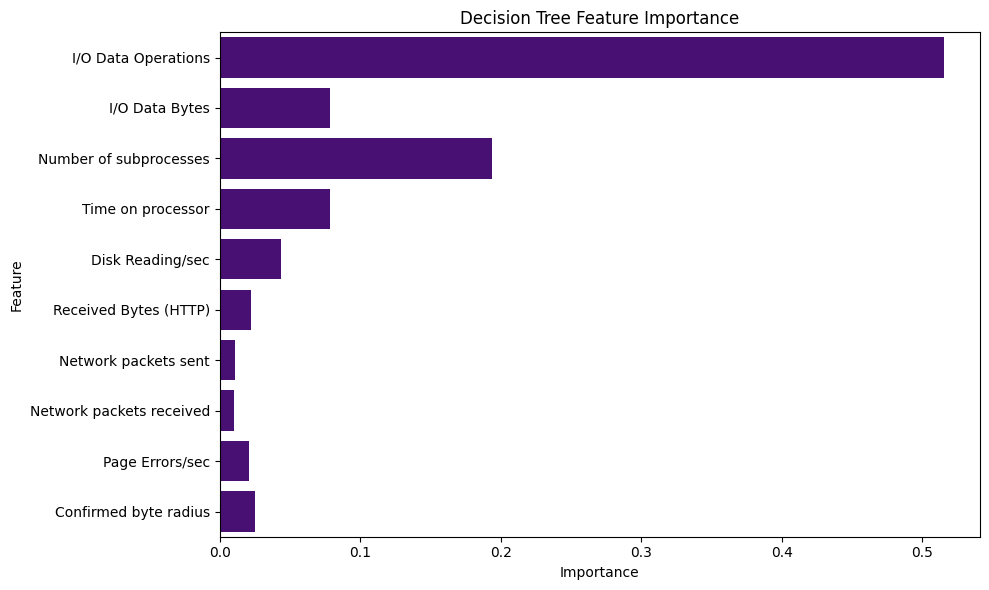

In [109]:
# Random Forest Feature Importance
dt_importance = dt.feature_importances_
feature_names = df.drop(columns=['ID', 'Label']).columns[selector.get_support()]

# Print the importance values
print("Decision Tree Feature Importance:")
for i, (feature, importance) in enumerate(zip(feature_names, dt_importance), 1):
    print(f"{i:2d}. {feature:25s}: {importance:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=dt_importance, y=feature_names, color='indigo')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic regression
lr = LogisticRegression(random_state=42, C=100, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

# Predict on test set
lr_test_pred = lr.predict(X_test)

# Save Logistic Regression model
joblib.dump(lr, '../models/logistic_regression_model.pkl')

# Training accuracy for Logistic Regression
lr_train_pred = lr.predict(X_train)
print("Logistic Regression Training Classification Report:\n", classification_report(y_train, lr_train_pred))

# Testing accuracy for Logistic Regression
test_accuracy_lr = accuracy_score(y_test, lr_test_pred)
print(f"\nLogistic Regression Accuracy: {test_accuracy_lr*100:.2f}%")
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_test_pred))

Logistic Regression Training Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      4182
           1       0.69      0.73      0.71      4182

    accuracy                           0.70      8364
   macro avg       0.70      0.70      0.70      8364
weighted avg       0.70      0.70      0.70      8364


Logistic Regression Accuracy: 68.88%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68      1046
           1       0.68      0.71      0.69      1046

    accuracy                           0.69      2092
   macro avg       0.69      0.69      0.69      2092
weighted avg       0.69      0.69      0.69      2092



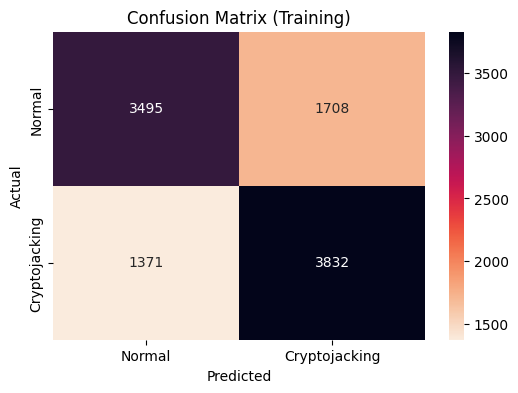

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Testing confusion matrix
cm_train = confusion_matrix(y_train, lr_train_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')
plt.show()

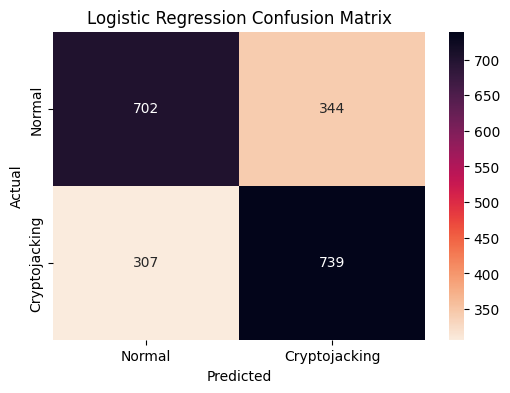

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Testing confusion matrix
cm_test = confusion_matrix(y_test, lr_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

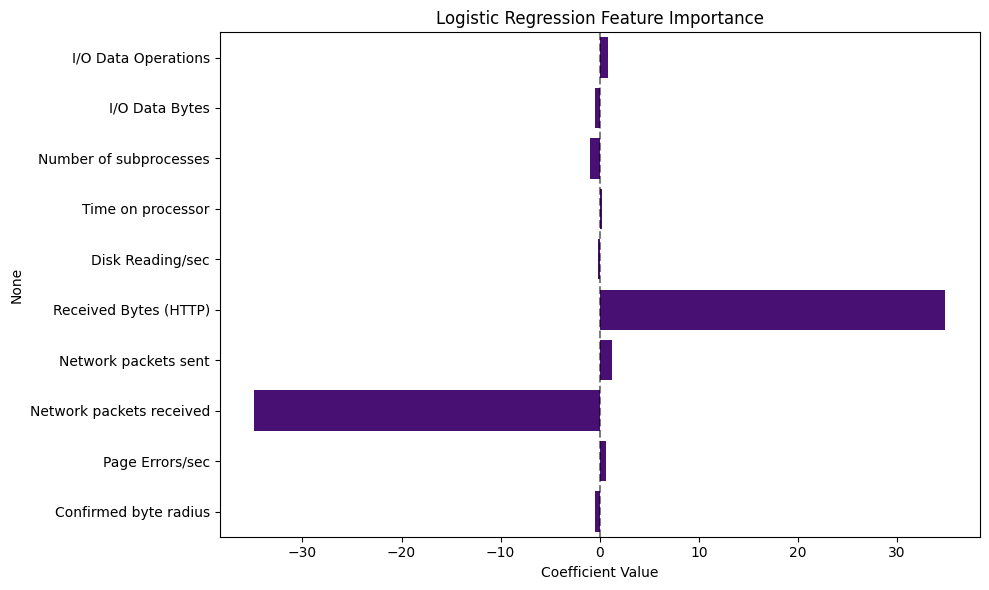

Rank Feature                   Coefficient 
----------------------------------------------------------------------
1    Received Bytes (HTTP)     34.8833     
2    Network packets received  -34.8634    
3    Network packets sent      1.2355      
4    Number of subprocesses    -0.9624     
5    I/O Data Operations       0.8272      
6    Page Errors/sec           0.6584      
7    I/O Data Bytes            -0.5130     
8    Confirmed byte radius     -0.4743     
9    Time on processor         0.2568      
10   Disk Reading/sec          -0.2163     


In [132]:
# Logistic Regression Feature Importance
lr_coefficients = lr.coef_[0]
selected_feature_names = df_train.drop(columns=['ID', 'Label']).columns[selector.get_support()]

plt.figure(figsize=(10, 6))
sns.barplot(x=lr_coefficients, y=selected_feature_names, color='indigo')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print detailed analysis
print(f"{'Rank':<4} {'Feature':<25} {'Coefficient':<12}")
print("-" * 70)

# Sort by absolute coefficient value
sorted_indices = np.argsort(np.abs(lr_coefficients))[::-1]

for i, idx in enumerate(sorted_indices, 1):
    feature = selected_feature_names[idx]
    coef = lr_coefficients[idx]
    print(f"{i:<4} {feature:<25} {coef:<12.4f}")

In [138]:
# Load test data
df_test = pd.read_csv("../dataset/Test.csv", low_memory=False)
print(f"Test dataset shape: {df_test.shape}")

# Preprocess test data (drop ID, scale features)
X_test_final = df_test.drop(columns=['ID'])
ids = df_test['ID']

df_test_final = df_test.copy()

# Use the same scaler as training
X_test_final_scaled = scaler.transform(X_test_final)

# Apply feature selection
X_test_final_selected = selector.transform(X_test_final_scaled)
print(f"After feature selection: {X_test_final_selected.shape}")

# Random Forest predictions
rf_pred_final = rf.predict(X_test_final_selected)
df_test_final['RF_Prediction'] = rf_pred_final

# Decision Tree predictions
dt_pred_final = dt.predict(X_test_final_selected)
df_test_final['DT_Prediction'] = dt_pred_final

# Logistic Regression predictions
lr_pred_final = lr.predict(X_test_final_selected)
df_test_final['LR_Prediction'] = lr_pred_final

# Save predictions to CSV
df_test_final[['ID', 'RF_Prediction', 'DT_Prediction', 'LR_Prediction']].to_csv('Test_Predictions.csv', index=False)
print("✅ Predictions saved to Test_Predictions.csv")

Test dataset shape: (3818, 15)
After feature selection: (3818, 10)
✅ Predictions saved to Test_Predictions.csv


c:\Users\zoroa\miniconda3\envs\cryptojack\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


In [103]:
print(df_test.shape)

(3818, 15)


In [159]:
# Simplified Black and White Activity Diagrams for Cryptojacking Detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

def create_simple_activity_diagram(model_name, model_params):
    fig, ax = plt.subplots(1, 1, figsize=(12, 16))  # Increased figure width
    
    # Define positions and sizes with wider boxes
    box_width = 2.5  # Decreased from 4.5 to 3
    box_height = 1 # Increased from 1 to 1.2
    start_x = 1.25  # Adjusted to center the boxes
    spacing = 1.8  # Increased spacing between boxes for larger arrows
    y_positions = np.arange(15, 0, -spacing)
    
    # Activity steps for cryptojacking detection
    activities = [
        "Data Collection",
        "Data Preprocessing\nHandling duplicates\nClass Balacing\nNormalize Features",
        "Feature Selection",
        "Split Dataset\nTrain: 80%\nTest: 20%",
        f"Train {model_name} Model\n{model_params}",
        f"Evaluate {model_name} Model\nAccuracy, Precision,\nRecall, F1-Score",
        "Predict\nNormal/Cryptojacking"
    ]
    
    # Draw activities - all black and white
    for i, activity in enumerate(activities):
        y = y_positions[i]
        
        # All boxes are white with black borders
        rect = FancyBboxPatch((start_x, y - box_height/2), box_width, box_height,
                            boxstyle="round,pad=0.1", 
                            facecolor='white', edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        
        # Format text - make only first line bold
        lines = activity.split('\n')
        if len(lines) > 1:
            # Add bold text for first line with Times New Roman font
            ax.text(start_x + box_width/2, y + 0.3, lines[0], 
                   ha='center', va='center', fontsize=11, weight='bold', color='black',
                   fontfamily='Times New Roman')
            
            # Add normal text for remaining lines with Times New Roman font
            if len(lines) > 1:
                remaining_text = '\n'.join(lines[1:])
                ax.text(start_x + box_width/2, y - 0.2, remaining_text, 
                       ha='center', va='center', fontsize=11, weight='normal', color='black',
                       fontfamily='Times New Roman')
        else:
            # Single line - make it bold with Times New Roman font
            ax.text(start_x + box_width/2, y, activity, 
                   ha='center', va='center', fontsize=11, weight='bold', color='black',
                   fontfamily='Times New Roman')
        
        # Draw arrows between activities
        if i < len(activities) - 1:
            # Start arrow from bottom of current box
            arrow_start_x = start_x + box_width/2
            arrow_start_y = y - box_height/2 - 0.1  # Slightly more gap from box
            
            # End arrow at top of next box
            arrow_end_y = y_positions[i+1] + box_height/2 + 0.1  # Slightly more gap to box
            
            # Create downward pointing arrow with increased height
            arrow = FancyArrowPatch((arrow_start_x, arrow_start_y), 
                                  (arrow_start_x, arrow_end_y),
                                  arrowstyle='->', 
                                  mutation_scale=25,  # Increased from 20 to 25
                                  color='black', 
                                  linewidth=2)
            ax.add_patch(arrow)
    
    # Set plot properties with adjusted limits
    ax.set_xlim(0, 5.5)  # Keep same limits
    ax.set_ylim(-1, 16)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Activity Diagram - {model_name} for Cryptojacking Detection', 
                fontsize=16, weight='bold', pad=20, color='black', fontfamily='Times New Roman')
    
    plt.tight_layout()
    plt.show()

# Model parameters matching your project style
rf_params = "max_depth = 10\nrandom_state = 42\nn_jobs = -1"
dt_params = "max_depth = 10\nrandom_state = 42"
lr_params = "C = 100\npenalty = L1\nsolver = liblinear"

print("Generating Black and White Activity Diagrams...")
print("=" * 60)

Generating Black and White Activity Diagrams...


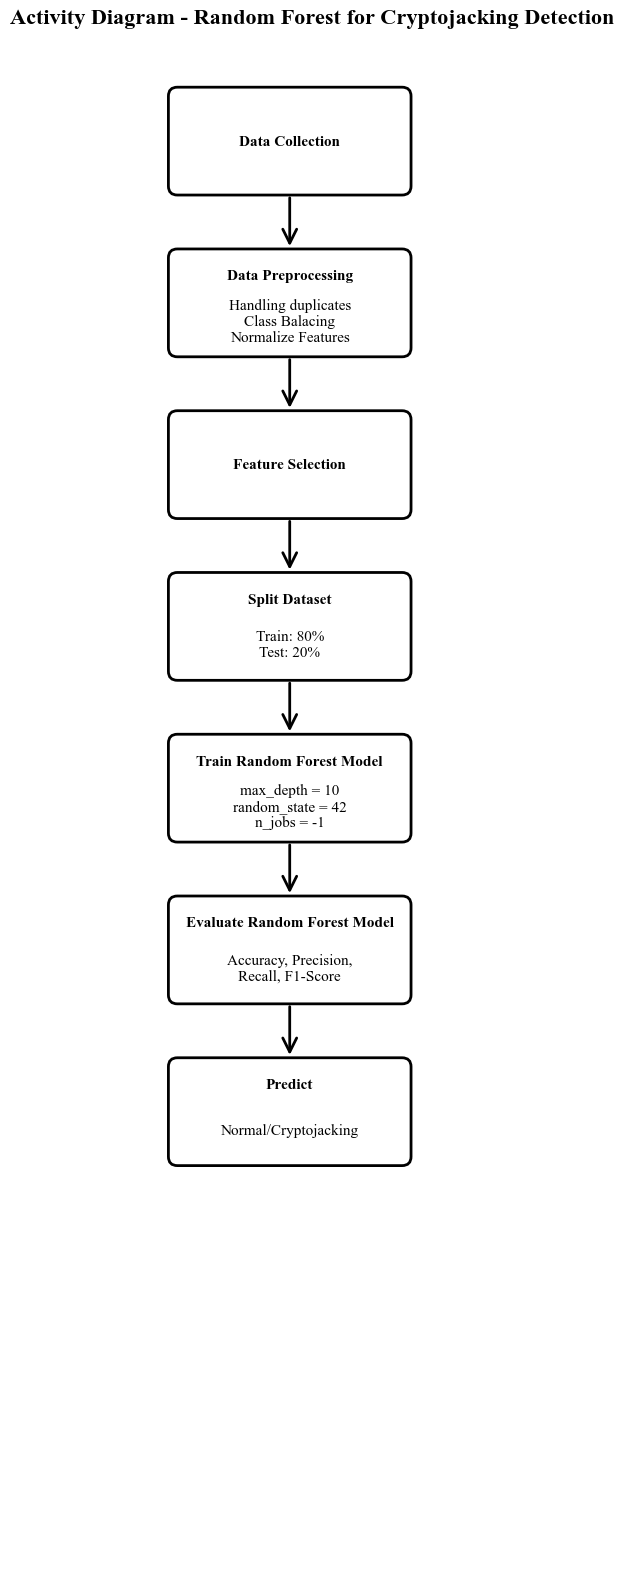

In [160]:
# Random Forest Activity Diagram
create_simple_activity_diagram("Random Forest", rf_params)

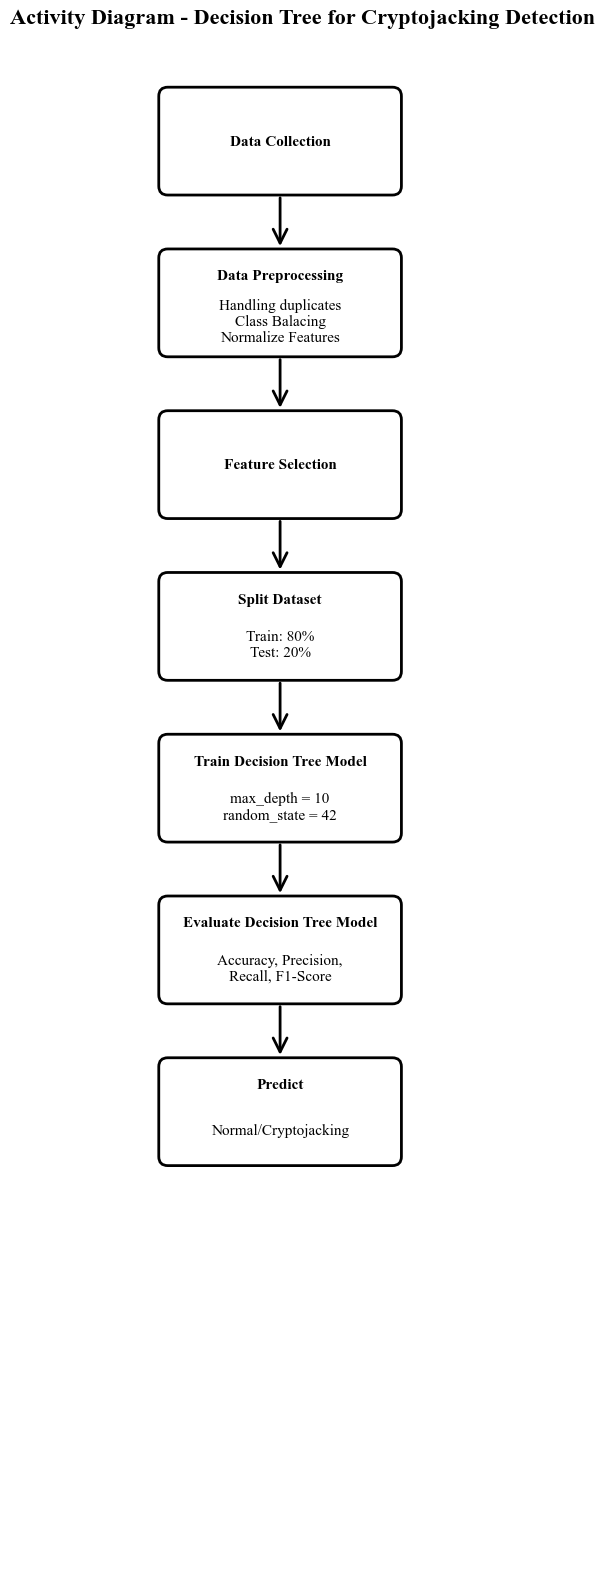

In [157]:
# Decision Tree Activity Diagram
create_simple_activity_diagram("Decision Tree", dt_params)

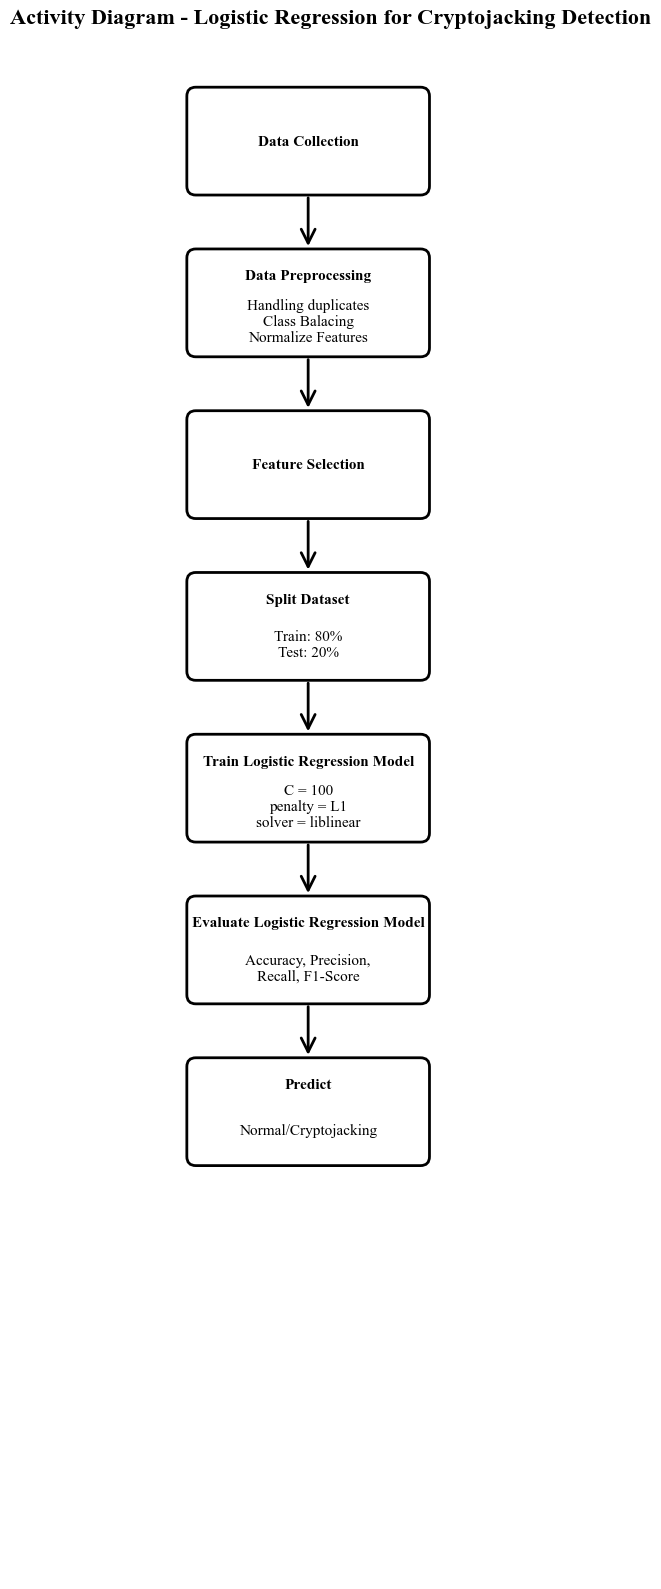

In [161]:
# Logistic Regression Activity Diagram
create_simple_activity_diagram("Logistic Regression", lr_params)

In [ ]:
# Comparative Activity Flow Summary
print("\n" + "="*80)
print("CRYPTOJACKING DETECTION - MODEL ACTIVITY FLOW SUMMARY")
print("="*80)

models_info = {
    "Random Forest": {
        "Key Steps": [
            "1. Data Collection (Train.csv with 14 features)",
            "2. Data Preprocessing (Remove duplicates, handle missing data)",
            "3. Feature Selection (SelectKBest - Top 10 features using F-test)",
            "4. Class Balancing (SMOTE to handle imbalanced classes)",
            "5. Feature Scaling (StandardScaler normalization)",
            "6. Train-Test Split (80%-20% stratified split)",
            "7. Model Training (RandomForestClassifier, max_depth=10)",
            "8. Model Evaluation (Accuracy, Precision, Recall, F1-Score)",
            "9. Performance Analysis (Confusion Matrix, ROC-AUC, Feature Importance)",
            "10. Prediction (Normal vs Cryptojacking classification)"
        ],
        "Parameters": "max_depth=10, random_state=42, n_jobs=-1",
        "Output": "Ensemble prediction with feature importance ranking"
    },
    
    "Decision Tree": {
        "Key Steps": [
            "1. Data Collection (Same as Random Forest)",
            "2. Data Preprocessing (Same preprocessing pipeline)",
            "3. Feature Selection (Same 10 selected features)",
            "4. Class Balancing (Same SMOTE application)",
            "5. Feature Scaling (Same StandardScaler)",
            "6. Train-Test Split (Same 80%-20% split)",
            "7. Model Training (DecisionTreeClassifier, max_depth=10)",
            "8. Model Evaluation (Same evaluation metrics)",
            "9. Performance Analysis (Tree-based feature importance)",
            "10. Prediction (Rule-based classification decisions)"
        ],
        "Parameters": "max_depth=10, random_state=42",
        "Output": "Single tree prediction with interpretable rules"
    },
    
    "Logistic Regression": {
        "Key Steps": [
            "1. Data Collection (Same dataset and features)",
            "2. Data Preprocessing (Same preprocessing steps)",
            "3. Feature Selection (Same 10 features)",
            "4. Class Balancing (Same SMOTE technique)",
            "5. Feature Scaling (Critical for LR - same scaler)",
            "6. Train-Test Split (Same data split)",
            "7. Model Training (LogisticRegression, C=100, L1 penalty)",
            "8. Model Evaluation (Same evaluation framework)",
            "9. Performance Analysis (Coefficient analysis for feature weights)",
            "10. Prediction (Probability-based classification)"
        ],
        "Parameters": "C=100, penalty='l1', solver='liblinear', random_state=42",
        "Output": "Probabilistic prediction with feature coefficients"
    }
}

for model, info in models_info.items():
    print(f"\n{model.upper()} WORKFLOW:")
    print("-" * 40)
    for step in info["Key Steps"]:
        print(f"  {step}")
    print(f"\n  Model Parameters: {info['Parameters']}")
    print(f"  Model Output: {info['Output']}")

print("\n" + "="*80)
print("COMMON EVALUATION METRICS FOR ALL MODELS:")
print("="*80)
print("• Accuracy Score")
print("• Precision, Recall, F1-Score")
print("• Confusion Matrix")
print("• ROC Curve & AUC Score")
print("• Precision-Recall Curve")
print("• Feature Importance/Coefficients")
print("• Learning Curves")
print("="*80)